In [1]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch import nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

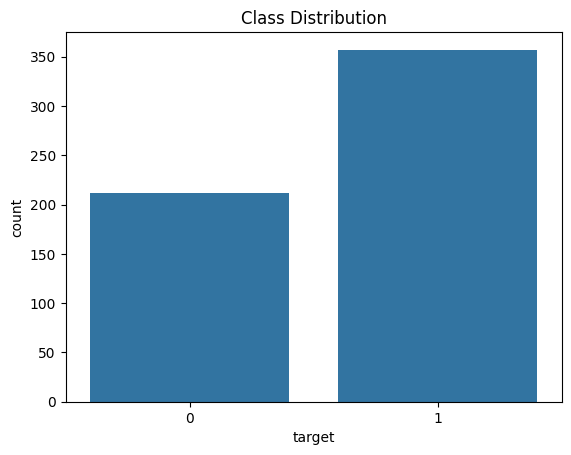

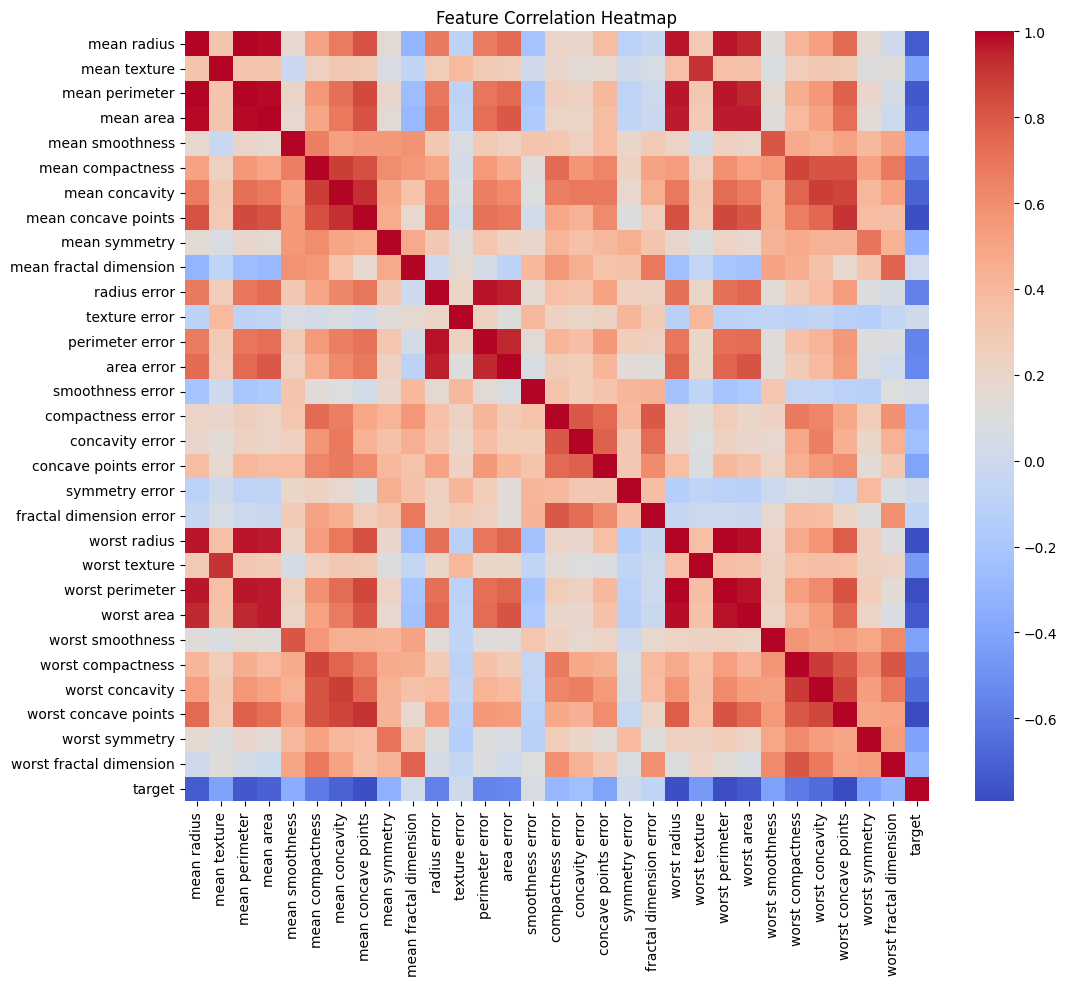

In [15]:
import seaborn as sns

# Target class distribution
sns.countplot(x='target', data=df)
plt.title("Class Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [4]:
print(data.keys())      # Shows: data, target, feature_names, etc.
print(data.feature_names)  # Column names


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
# Split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.02, random_state= 24)


In [6]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # X is your original feature matrix


In [7]:
# Create Custom Dataset

class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype= torch.float64)
        self.y = torch.tensor(y, dtype= torch.float64)

    def __len__(self):
        return len(self.X)


    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [8]:
# Create Train & Test dataset:

train_dataset = CustomDataset(X_train, X_test)
test_dataset = CustomDataset(X_train, y_test)

In [9]:
# Create Train & Test dataLoader:

train_dataloader = DataLoader(CustomDataset(X_train, y_train), batch_size = 32, shuffle = True)
test_dataloader = DataLoader(CustomDataset(X_test, y_test), batch_size = 32, shuffle = False)


In [10]:
import torch.nn as nn

class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()  # Correct way to call superclass constructor

        self.model = nn.Sequential(
            nn.Linear(30, 18),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(18, 12),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(12, 8),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(8, 2)  # Output layer: 2 classes (malignant/benign)
        )

    def forward(self, x):
        return self.model(x)


In [12]:
# Adjust Hyperparameters
epochs = 500
learning_rate = 0.01

# Instantiate the model (no arguments needed based on your previous NN class)
model = NN()

# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [13]:
# Set model to training mode
model.train()

for epoch in range(epochs):
    for X_batch, y_batch in train_dataloader:

        # Move to float (if not already) and ensure label dtype
        X_batch = X_batch.float()
        y_batch = y_batch.long()

        # Forward pass
        outputs = model(X_batch)

        # Compute loss
        loss = loss_fn(outputs, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print loss every 10 epochs (optional)
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")



Epoch [10/500], Loss: 0.4969
Epoch [20/500], Loss: 0.3547
Epoch [30/500], Loss: 0.3163
Epoch [40/500], Loss: 0.4101
Epoch [50/500], Loss: 0.4056
Epoch [60/500], Loss: 0.2936
Epoch [70/500], Loss: 0.0687
Epoch [80/500], Loss: 0.5802
Epoch [90/500], Loss: 0.2730
Epoch [100/500], Loss: 0.3448
Epoch [110/500], Loss: 0.0399
Epoch [120/500], Loss: 0.1039
Epoch [130/500], Loss: 0.2497
Epoch [140/500], Loss: 0.8181
Epoch [150/500], Loss: 0.5886
Epoch [160/500], Loss: 0.1192
Epoch [170/500], Loss: 0.0709
Epoch [180/500], Loss: 0.1153
Epoch [190/500], Loss: 0.2044
Epoch [200/500], Loss: 0.1088
Epoch [210/500], Loss: 0.1563
Epoch [220/500], Loss: 0.0846
Epoch [230/500], Loss: 0.3711
Epoch [240/500], Loss: 0.2693
Epoch [250/500], Loss: 0.1645
Epoch [260/500], Loss: 0.1636
Epoch [270/500], Loss: 0.1997
Epoch [280/500], Loss: 0.0793
Epoch [290/500], Loss: 0.3025
Epoch [300/500], Loss: 0.0659
Epoch [310/500], Loss: 0.1787
Epoch [320/500], Loss: 0.0525
Epoch [330/500], Loss: 0.4435
Epoch [340/500], Lo

In [14]:
# Set model to evaluation mode
model.eval()

# Disable gradient computation for inference
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_dataloader:
        X_batch = X_batch.float()
        y_batch = y_batch.long()

        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)

        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = 100 * correct / total
print(f"\n✅ Test Accuracy: {accuracy:.2f}%")



✅ Test Accuracy: 91.67%


In [15]:
# Set model to evaluation mode
model.eval()

# Disable gradient computation for inference
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in train_dataloader:
        X_batch = X_batch.float()
        y_batch = y_batch.long()

        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)

        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = 100 * correct / total
print(f"\n✅ Test Accuracy: {accuracy:.2f}%")


✅ Test Accuracy: 96.05%
